<a href="https://colab.research.google.com/github/mmaruthi/ML-BootCamp-/blob/master/Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
uploaded = files.upload()

Saving ibm_data.csv to ibm_data.csv


KeyboardInterrupt: ignored

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## Read the data ## 
data = pd.read_csv('ibm_data.csv')

In [5]:
## Statistics ##
print('########## Dataset Infomarion ##########')
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\n########## Features ##########\n" ,data.columns.tolist())
print ("\n Total Missing values : ",data.isnull().sum().values.sum())
print("\n########## Details for missing values : ##########\n", data.isnull().sum())

########## Dataset Infomarion ##########
Rows     :  778428
Columns  :  19

########## Features ##########
 ['Unnamed: 0', 'ctry_name', 'intgrtd_mngmt_name', 'intgrtd_operating_team_name', 'city', 'st', 'sec_lvl_domn', 'device_type', 'operating_sys', 'ip_addr', 'user_agent', 'VISIT', 'ENGD_VISIT', 'VIEWS', 'page_url', 'wk', 'mth', 'yr', 'page_vw_ts']

 Total Missing values :  933955

########## Details for missing values : ##########
 Unnamed: 0                          0
ctry_name                           0
intgrtd_mngmt_name                  0
intgrtd_operating_team_name         0
city                            34745
st                              33886
sec_lvl_domn                   237066
device_type                    624989
operating_sys                    1343
ip_addr                             0
user_agent                          5
VISIT                               0
ENGD_VISIT                          0
VIEWS                               0
page_url                     

In [0]:
## Dropping some unwanted columns ## 
## axis=1 specifies that it's a column.If we dont give anythng by default it will take as axis=0
## inplace=True makes sure that the changes are permanent 
data.drop('Unnamed: 0',axis=1,inplace=True)
data.drop('device_type',axis=1,inplace=True)

In [0]:
## Create a check point just for any future reference ## 
data_bp1 = data.copy()

In [9]:
## Lets do data.info to check what data types are present ## 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778428 entries, 0 to 778427
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   ctry_name                    778428 non-null  object
 1   intgrtd_mngmt_name           778428 non-null  object
 2   intgrtd_operating_team_name  778428 non-null  object
 3   city                         743683 non-null  object
 4   st                           744542 non-null  object
 5   sec_lvl_domn                 541362 non-null  object
 6   operating_sys                777085 non-null  object
 7   ip_addr                      778428 non-null  object
 8   user_agent                   778423 non-null  object
 9   VISIT                        778428 non-null  int64 
 10  ENGD_VISIT                   778428 non-null  int64 
 11  VIEWS                        778428 non-null  int64 
 12  page_url                     778427 non-null  object
 13  wk            

In [0]:
##Page_vw_ts is an obect ## 
# # Importing Datetime time module  and creating new column for days of week and Month to use it afterwards ## 
import datetime
data.page_vw_ts = pd.to_datetime(data.page_vw_ts)
data['date'] = pd.to_datetime(data.page_vw_ts)

In [12]:
data.date

0        2019-06-04 05:05:18.023100
1        2019-06-04 05:07:11.014300
2        2019-06-04 05:08:46.081900
3        2019-06-04 05:07:22.033300
4        2019-06-04 05:05:27.027700
                    ...            
778423   2019-06-04 13:02:19.081300
778424   2019-06-04 12:59:18.065600
778425   2019-06-04 12:17:04.046600
778426   2019-06-04 13:01:21.000200
778427   2019-06-04 12:14:27.000000
Name: date, Length: 778428, dtype: datetime64[ns]

In [0]:
## setting index of dataframe to date for analysis
data.set_index('date',inplace=True)

In [14]:
data.date

AttributeError: ignored

In [17]:
## Let's see how the data is looking for 2019 and 2018 years 
data['2019'].shape
#data['2018'].shape
#data.isnull().sum()

(776469, 17)

In [18]:
data['2018'].shape

(21, 17)

Text(0.5, 1.0, 'intgrtd_mngmt_name')

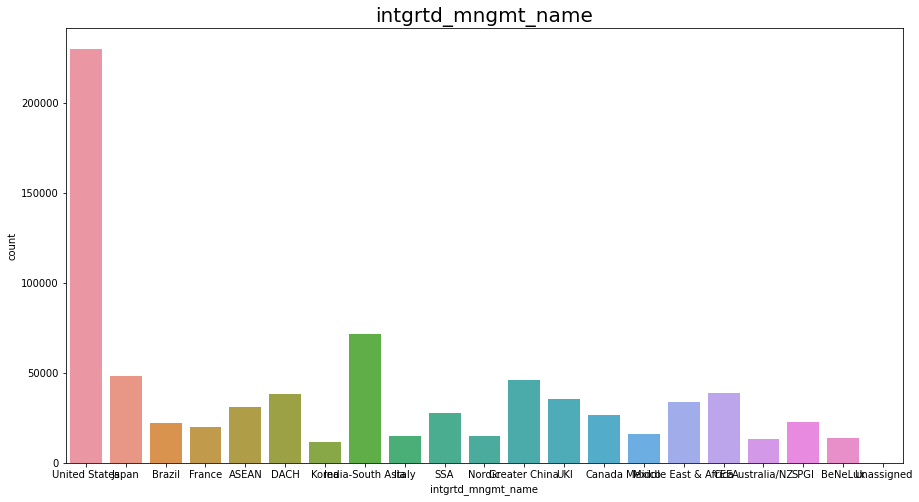

In [20]:
## Let us see how the column intgrtd_mngmt_name looks like ##
plt.figure(figsize=(15,8))                    ## This gives us a box of 15 by 8 
sns.countplot(x=data['intgrtd_mngmt_name'])   ## Plotting for this column keeping it in x axis 
plt.title('intgrtd_mngmt_name',size=20)       ## Title 

Text(0.5, 1.0, 'intgrtd_mngmt_name')

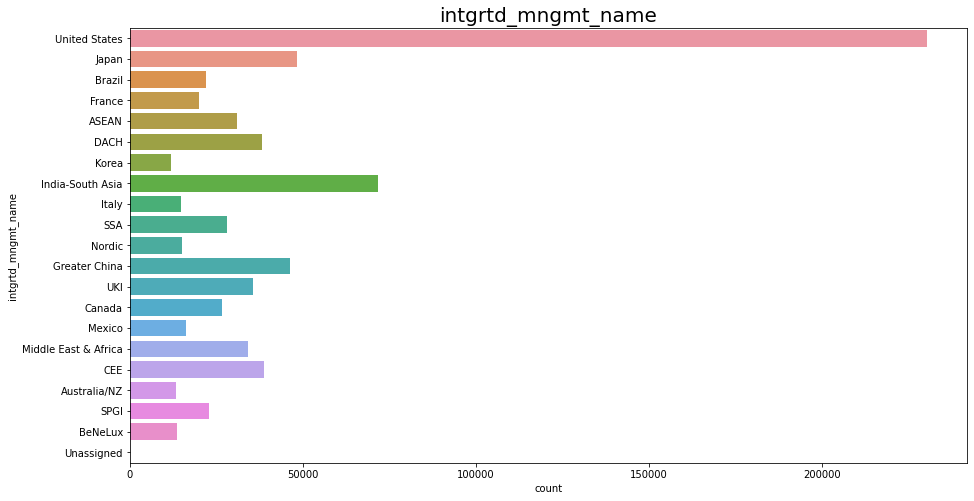

In [21]:
## As the country names are overlaying , let us plot it in Y axis ##
plt.figure(figsize=(15,8))                    ## This gives us a box of 15 by 8 
sns.countplot(y=data['intgrtd_mngmt_name'])   ## Plotting for this column keeping it in y axis 
plt.title('intgrtd_mngmt_name',size=20)       ## Title 

ValueError: ignored

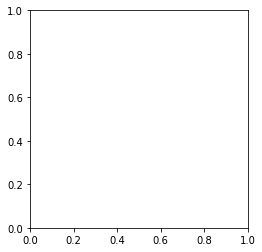

In [22]:
## Let us try to see this in a Pie representation 
plt.pie(data['intgrtd_mngmt_name'])
plt.show()

ValueError: ignored

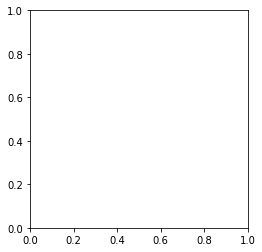

In [26]:
# As it is throwing error like above - let us first convertt that intgrtd_mngmt_type from object to float and then try a pie chart 
data['intgrtd_mngmt_name'] = data['intgrtd_mngmt_name'].astype(float)
#data['intgrtd_mngmt_name'] = pd.to_numeric(data['intgrtd_mngmt_name'],errors='coerce')
plt.pie(data['intgrtd_mngmt_name'])
plt.show()


In [32]:
#data['intgrtd_mngmt_name'] = pd.to_numeric(data['intgrtd_mngmt_name'],errors='coerce')
data.intgrtd_mngmt_name.value_counts().plt.pie()
plt.show()

AttributeError: ignored

In [0]:
## Let us draw a Pivot table 
a = data.pivot_table(['ip_addr'],('ctry_name'),aggfunc = 'count')
a = a.sort_values('ip_addr',ascending=False).head(20)

Text(0.5, 1.0, 'County Which Most Traffic is from ?')

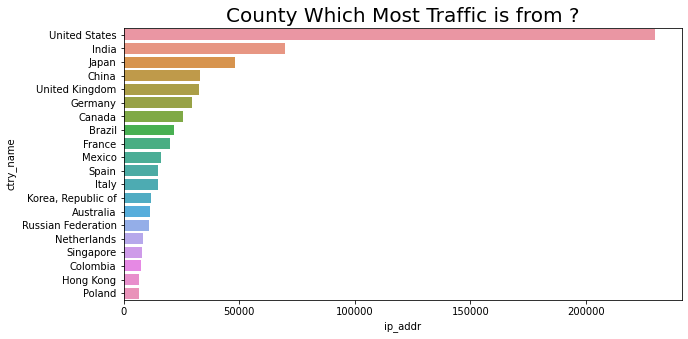

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(a.ip_addr,a.index)
plt.title("County Which Most Traffic is from ?",size=20)

## From the above plot we understand that most traffic is from US, INDIA and JAPAN## 

Text(0.5, 1.0, 'which is most used OS?')

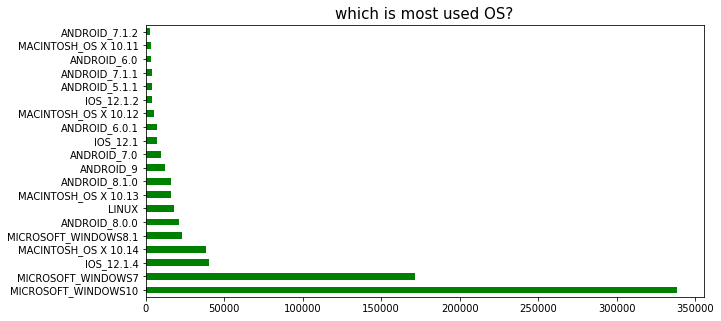

In [29]:
## Let us see which is the most used OS ? ## 
plt.figure(figsize=(10,5))
data.operating_sys.value_counts().head(20).plot.barh(color = ('green'))
plt.title('which is most used OS?', size=15)

Text(0.5, 1.0, 'Which Website is Visited Most from most frequent 10?')

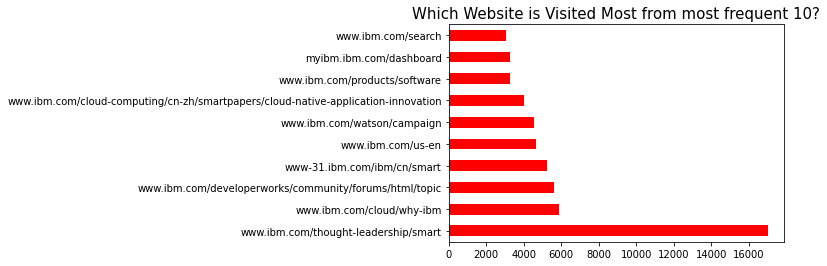

In [33]:
data.page_url.value_counts().head(10).plot.barh(color='red')
plt.title('Which Website is Visited Most from most frequent 10?',size=15)